# Assignment Machine Learning

## Rigone, Iannotta, Bembhy

## 1. Importing

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('model.csv')
colors = pd.read_csv('colors.csv')

In [8]:
colors.head()

,color,hue_deg,saturation_perc,light_perc
0,1-beige,60.0,56.0,91.0
1,2-black,0.0,0.0,0.0
2,3-blue,240.0,100.0,50.0
3,4-brown,0.0,59.0,41.0
4,5-burgundy,345.0,100.0,25.0


In [9]:
df_m = pd.merge(df, colors, left_on='color', right_on=colors.index)
df_m.drop('color_x', axis=1, inplace=True)
df_m.head()

,color,year,month,day,country,category,position,photo,price,page,time,model,order,color_y,hue_deg,saturation_perc,light_perc
0,12,2008,5,11,29,2,6,1,52,1,15.796005,B16,52,13-violet,300.0,76.0,72.0
1,12,2008,6,10,29,2,1,1,67,2,4.809318,B21,4,13-violet,300.0,76.0,72.0
2,12,2008,4,19,29,1,1,2,33,2,5.550220,A19,4,13-violet,300.0,76.0,72.0
3,12,2008,4,19,29,3,1,1,43,1,3.548648,C2,2,13-violet,300.0,76.0,72.0
4,12,2008,5,22,9,2,1,1,52,1,5.427027,B3,4,13-violet,300.0,76.0,72.0


In [10]:
df.shape

(20000, 13)

In [11]:
df.head()

,year,month,day,country,category,color,position,photo,price,page,time,model,order
0,2008,5,11,29,2,12,6,1,52,1,15.796005,B16,52
1,2008,4,8,29,4,2,6,2,38,1,13.719894,P17,8
2,2008,5,22,46,3,11,2,1,48,1,6.367013,C5,1
3,2008,4,24,29,2,7,2,1,38,2,11.516574,B23,15
4,2008,7,2,29,2,10,2,1,52,1,8.084617,B4,3


In [12]:
import time
import datetime

df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

df['weekday'] = ((pd.DatetimeIndex(df.index).dayofweek) // 5 == 1).astype(float)


In [13]:
df['day_of_week'] = pd.to_datetime(df['date']).dt.dayofweek

In [14]:
df['weekday'] = df['day_of_week'].apply(lambda x: 1 if x < 5 else 0)

In [15]:
df.head()

,year,month,day,country,category,color,position,photo,price,page,time,model,order,date,weekday,day_of_week
0,2008,5,11,29,2,12,6,1,52,1,15.796005,B16,52,2008-05-11,0,6
1,2008,4,8,29,4,2,6,2,38,1,13.719894,P17,8,2008-04-08,1,1
2,2008,5,22,46,3,11,2,1,48,1,6.367013,C5,1,2008-05-22,1,3
3,2008,4,24,29,2,7,2,1,38,2,11.516574,B23,15,2008-04-24,1,3
4,2008,7,2,29,2,10,2,1,52,1,8.084617,B4,3,2008-07-02,1,2


In [16]:
df.drop(['date', 'day_of_week'], inplace=True, axis=1)

### 1.2 Null Values

In [17]:
df.isnull().sum()

year        0
month       0
day         0
country     0
category    0
color       0
position    0
photo       0
price       0
page        0
time        0
model       0
order       0
weekday     0
dtype: int64

In [18]:
df.nunique()

year            1
month           5
day            31
country        46
category        4
color          14
position        6
photo           2
price          20
page            5
time        20000
model         213
order          98
weekday         2
dtype: int64

In [19]:
df.drop('year', axis=1, inplace=True)
df.columns

Index(['month', 'day', 'country', 'category', 'color', 'position', 'photo',
       'price', 'page', 'time', 'model', 'order', 'weekday'],
      dtype='object')

No null values.

We dropped the 'year' column because it's just one value. Now we know that the dataset corresponds all to 2008.

### 1.3 Split Categorical and Numerical

In [20]:
df.nunique()

month           5
day            31
country        46
category        4
color          14
position        6
photo           2
price          20
page            5
time        20000
model         213
order          98
weekday         2
dtype: int64

In [21]:
df.dtypes

month         int64
day           int64
country       int64
category      int64
color         int64
position      int64
photo         int64
price         int64
page          int64
time        float64
model        object
order         int64
weekday       int64
dtype: object

In [22]:
cat = ['month', 'day','country', 'category', 'color', 'position', 'photo', 'page', 'model', 'weekday']
df_cat = df[cat]

num = ['price', 'time', 'order']
df_num = df[num]

df_num.head()

,price,time,order
0,52,15.796005,52
1,38,13.719894,8
2,48,6.367013,1
3,38,11.516574,15
4,52,8.084617,3


### 1.3.2 Categorical

In [23]:
#Funciton to display values on bar chart

def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

#### Month

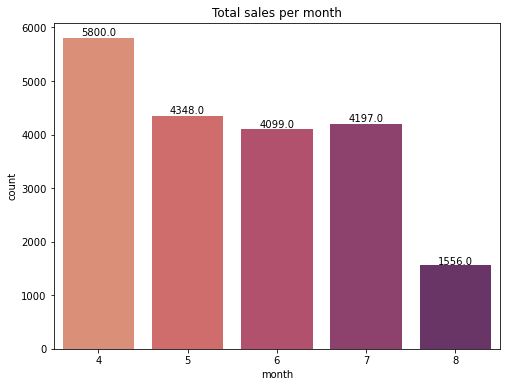

In [24]:
#count sales per month
plt.figure(figsize=(8,6))
plt.title('Total sales per month')
p = sns.countplot(x='month', data=df, palette='flare')
show_values(p)

The month 4 has been the one the one with the most sales in quantity. Then sales declined for 3 month until they remained at around the same values. Month 8 was lower, maybe due to less dates.

In [25]:
month_mean = df.groupby('month').mean()[['order']]

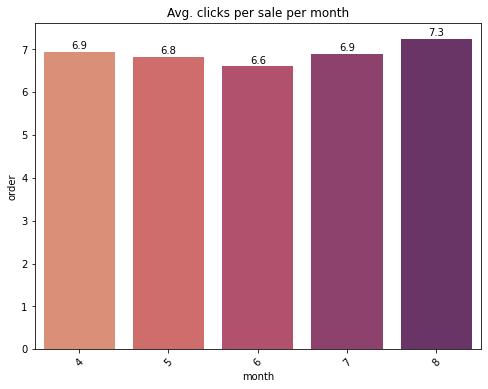

In [26]:
plt.figure(figsize=(8,6))
plt.title('Avg. clicks per sale per month')
plt.xticks(rotation=45)
p = sns.barplot(x = month_mean.index , y = month_mean['order'], data = month_mean, palette='flare')
show_values(p)

The mean clicks by month is kind of the same.

In [27]:
print('The month 4 has {} days'.format(df[df['month'] == 4].nunique()[1]))
print('The month 5 has {} days'.format(df[df['month'] == 5].nunique()[1]))
print('The month 6 has {} days'.format(df[df['month'] == 6].nunique()[1]))
print('The month 7 has {} days'.format(df[df['month'] == 7].nunique()[1]))
print('The month 8 has {} days'.format(df[df['month'] == 8].nunique()[1]))

The month 4 has 30 days
The month 5 has 31 days
The month 6 has 30 days
The month 7 has 31 days
The month 8 has 13 days


#### Day

In [28]:
day_mean = df.groupby('day').mean()[['order']]
weekday_mean = df.groupby('weekday').mean()[['order']]
weekday_count = df.groupby('weekday').count()[['order']]

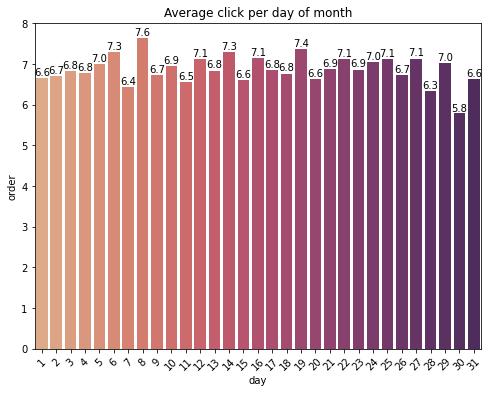

In [29]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=45)
plt.title('Average click per day of month')
p = sns.barplot(x = day_mean.index , y = day_mean['order'], data = day_mean, palette='flare')
show_values(p)

The day neither helps us. On average the clicks are the same for all days.

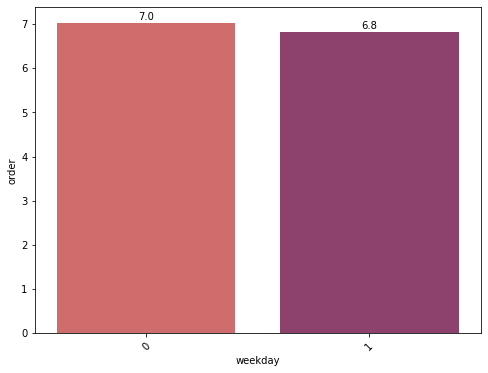

In [30]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=45)
p = sns.barplot(x = weekday_mean.index , y = weekday_mean['order'], data = weekday_mean, palette='flare')
show_values(p)

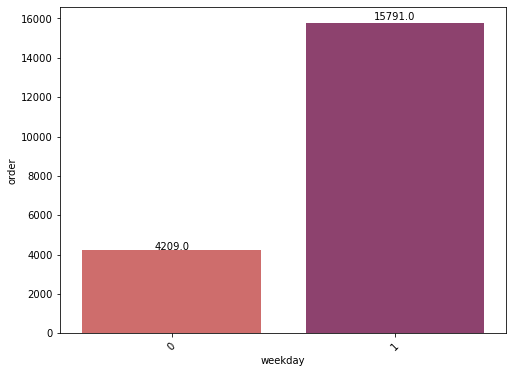

In [31]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=45)
p = sns.barplot(x = weekday_count.index , y = weekday_count['order'], data = weekday_count, palette='flare')
show_values(p)

 That is going to explain our numbers.

In [32]:
df4 = df[df['month']==4]
df5 = df[df['month']==5]
df6 = df[df['month']==6]
df7 = df[df['month']==7]
df8 = df[df['month']==8]

frames = [df4, df5, df6, df7, df8]

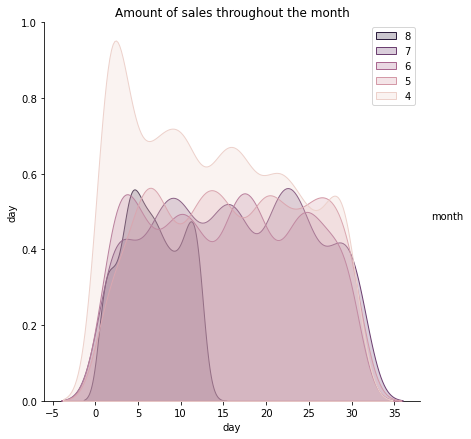

In [33]:
sns.pairplot(data=df_cat[["month","day"]], hue="month", height=6, kind='kde')
plt.title('Amount of sales throughout the month')
plt.legend(['8', '7', '6', '5', '4'])

We can see how sales decline for all the months adter aproximately the day 25.
The 4 month has very large quantity of sales on the first day. The other behave kind on in a similar way.

#### Page

In [34]:
mean_order_page = df.groupby('page').mean()[['order']]
count_order_page = df.groupby('page').count()[['order']]

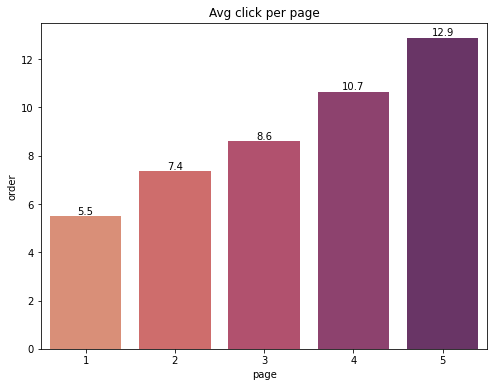

In [35]:
plt.figure(figsize=(8,6))
plt.title('Avg click per page')
p = sns.barplot(data=mean_order_page, x=mean_order_page.index, y='order', palette='flare')
show_values(p)

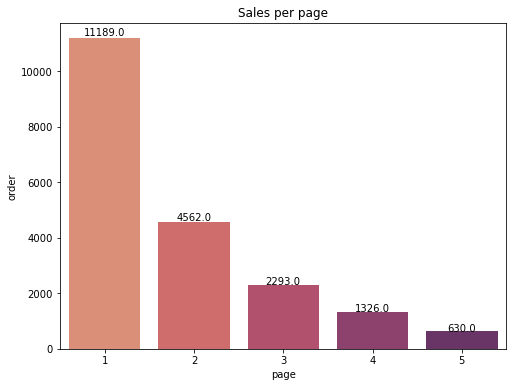

In [36]:
plt.figure(figsize=(8,6))
plt.title('Sales per page')
p = sns.barplot(data=count_order_page, x=count_order_page.index, y='order', palette='flare')
show_values(p)

The average number of clicks of an order increases as the product page increases. We could say this two variables are highly correlated and are going to help us predict the outcome.

#### Country

In [37]:
print('Poland is the {}% of all the values'.format((df[df['country'] == 29]['country'].count() / df['country'].count())*100))
print('Cezch Republic is the {}% of all the values'.format((df[df['country'] == 9]['country'].count() / df['country'].count())*100))
print('Poland is the {}% of all the values'.format((df[df['country'] == 46]['country'].count() / df['country'].count())*100))
print('Poland is the {}% of all the values'.format((df[df['country'] == 24]['country'].count() / df['country'].count())*100))

Poland is the 81.36% of all the values
Cezch Republic is the 9.51% of all the values
Poland is the 2.825% of all the values
Poland is the 2.1999999999999997% of all the values


This 4 countries account for more than 95% of our total sales

We are going to leave out countries with less than 50 orders.

In [38]:
counts = df['country'].value_counts()

res = df[~df['country'].isin(counts[counts < 50].index)]
df = res

varlist = (29,9,46,24,44,41,16,21,34)
fillist = ('Poland','Czech Republic','.net','Lithuania','.com','United Kingdom', 'Germany','Ireland','Slovakia')
replace_map = dict(zip(varlist,fillist))
df['country'] = df['country'].replace(replace_map)

In [39]:
mean_order_country = df.groupby('country').mean()[['order']]
count_order_country = df.groupby('country').count()[['order']]

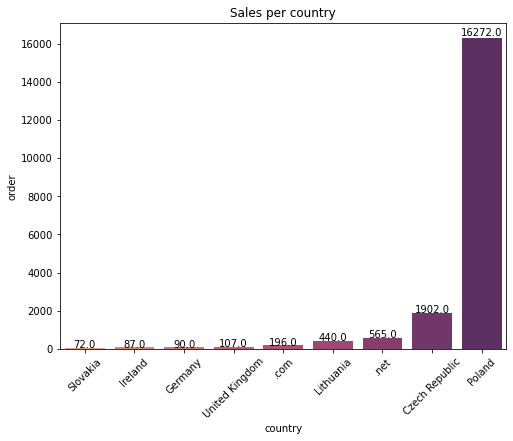

In [40]:
plt.figure(figsize=(8,6))
plt.title('Sales per country')
p = sns.barplot(data=count_order_country, x=count_order_country.index, y='order', palette='flare', order=count_order_country.sort_values('order').index)
plt.xticks(rotation=45)
show_values(p)

There is a country that represents the biggest part of the variables.

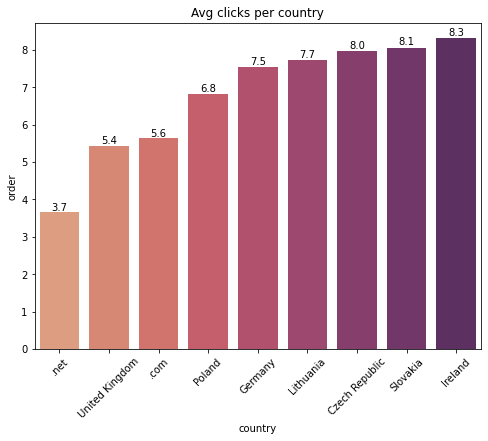

In [41]:
plt.figure(figsize=(8,6))
plt.title('Avg clicks per country')
p = sns.barplot(data=mean_order_country, x=mean_order_country.index, y='order', palette='flare', order=mean_order_country.sort_values('order').index)
plt.xticks(rotation=45)
show_values(p)

In [42]:
count_mean_country = pd.concat([mean_order_country, count_order_country], axis=1)
count_mean_country.columns = ['order', 'count']
count_mean_country.sort_values('order', ascending=False)

,order,count
country,,
Ireland,8.310345,87
Slovakia,8.055556,72
Czech Republic,7.965300,1902
Lithuania,7.718182,440
Germany,7.544444,90
Poland,6.820551,16272
.com,5.637755,196
United Kingdom,5.429907,107
.net,3.672566,565


There are some countries that buy with much less clicks than others. For example, Latvia is the country with the highest average number of clicks per order with 23, while British Virgin Island, UAE and Cyprus have just one. This is very conditioned by the fact that these contries only have one order in place too.

#### Position

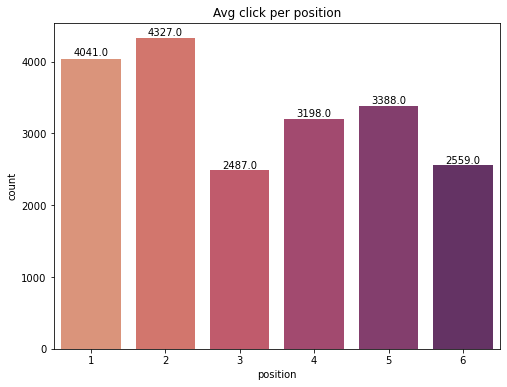

In [43]:
plt.figure(figsize=(8,6))
plt.title('Avg click per position')
p = sns.countplot(data=df_cat, x='position', palette='flare')
show_values(p)

We can identify how products positiones on the left hand side of the screen sell more than the ones on the right. At the same time , products on top sell more than the ones below.

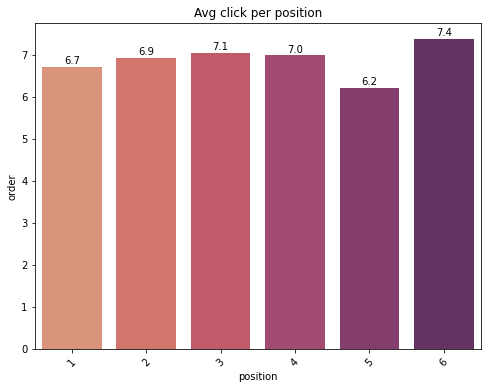

In [44]:
position_mean = df.groupby('position').mean()[['order']]
position_mean.head()

plt.figure(figsize=(8,6))
plt.title('Avg click per position')
plt.xticks(rotation=45)
p = sns.barplot(x = position_mean.index , y = position_mean['order'], data = position_mean, palette='flare')
show_values(p)

Again we can see the pattern repeat, but without as meaningful impact as on the countplot above. The products on top and on the left sell with less amount of clicks on average than the other ones.

#### Photo

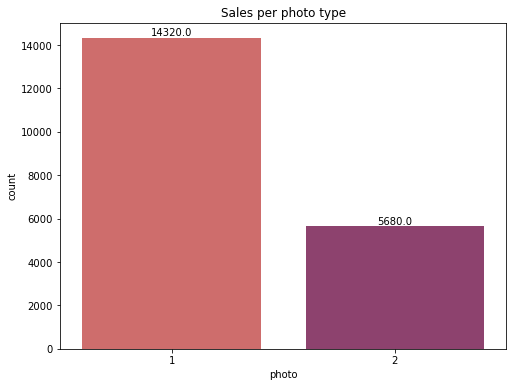

In [45]:
plt.figure(figsize=(8,6))
plt.title('Sales per photo type')
p = sns.countplot(data=df_cat, x='photo', palette='flare')
show_values(p)

Products with face photos have more sells than those with profile photos.

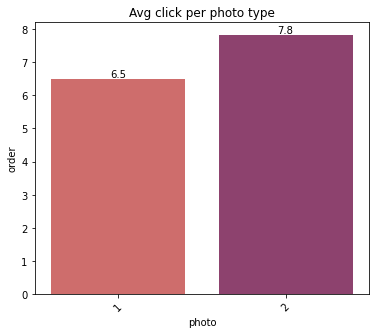

In [46]:
photo_mean = df.groupby('photo').mean()[['order']]
photo_mean.head()

plt.figure(figsize=(6,5))
plt.title('Avg click per photo type')
plt.xticks(rotation=45)
p=sns.barplot(x = photo_mean.index , y = photo_mean['order'], data = photo_mean, palette='flare')
show_values(p)

The pattern repeats. The products with face photos sell with 1.3 less clicks on average than those with profile photos.

#### Category

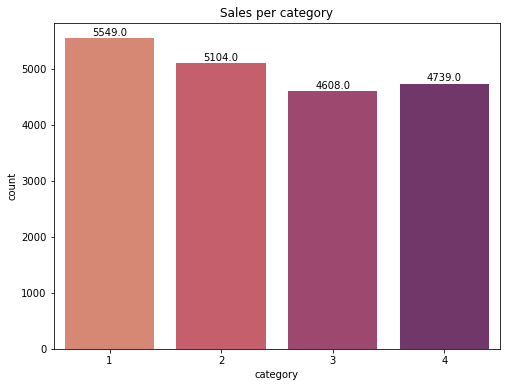

In [47]:
plt.figure(figsize=(8,6))
plt.title('Sales per category')
p = sns.countplot(data=df_cat, x='category', palette='flare')
show_values(p)

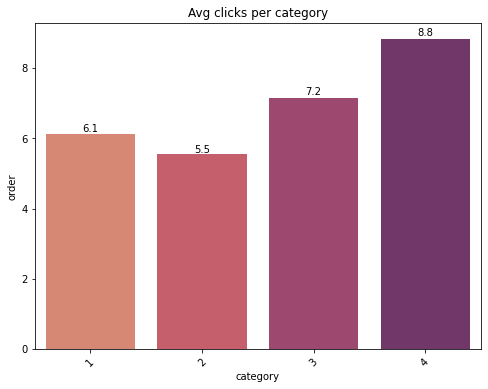

In [48]:
category_mean = df.groupby('category').mean()[['order']]
category_mean.head()

plt.figure(figsize=(8,6))
plt.xticks(rotation=45)
plt.title('Avg clicks per category')
p=sns.barplot(x = category_mean.index , y = category_mean['order'], data = category_mean, palette='flare')
show_values(p)

Seems that different categories orders get sales with different amount of clicks.

For example, sale products sell with an average of 8.9 clicks, while skirts only with 5.6.

#### Color

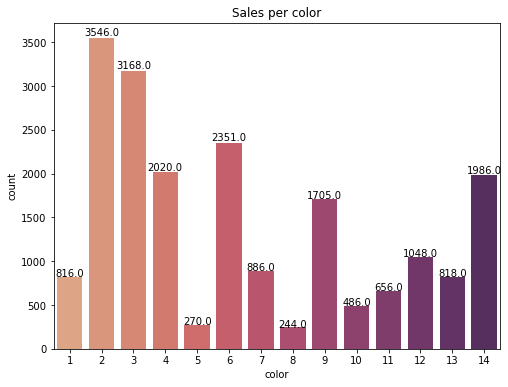

In [49]:
plt.figure(figsize=(8,6))
plt.title('Sales per color')
p = sns.countplot(data=df_cat, x='color', palette='flare')
show_values(p)

In [50]:
color_mean_order = df.groupby('color').mean()[['order']]
color_count_order = df.groupby('color').count()[['order']]

color_count_mean = pd.concat([color_mean_order, color_count_order], axis=1)
color_count_mean.columns = ['mean_order', 'count_order']

color_count_mean.sort_values(by='mean_order', ascending = False)

,mean_order,count_order
color,,
5,12.059701,268
6,8.016810,2320
7,7.855835,874
14,7.645079,1961
4,7.029663,1989
2,6.958106,3485
9,6.881688,1682
13,6.876695,811
11,6.831029,651


Black products are best sellers, followed by blue and gray. Burgundy and navy blue are the products that have the least orders. This can also be due to the amount of products of this colors that there is.

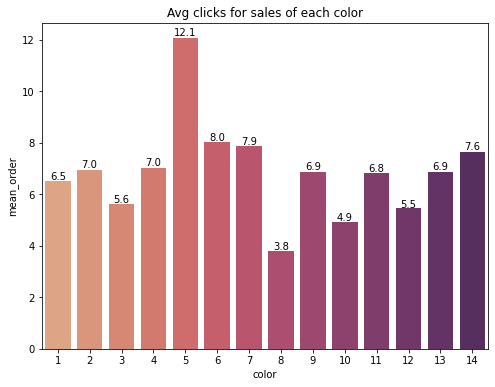

In [51]:
#plot
plt.figure(figsize=(8,6))
p = sns.barplot(x=color_count_mean.index, y='mean_order', palette='flare',data=color_count_mean)
plt.title('Avg clicks for sales of each color')
show_values(p)

Some colors seem to sell faster than others.

#### Models

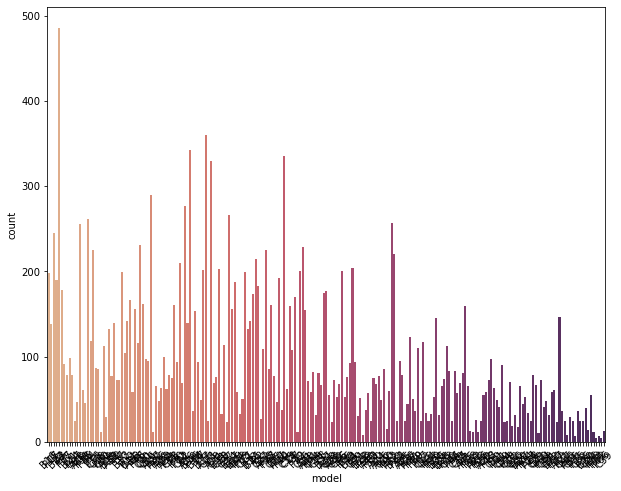

In [52]:
plt.figure(figsize=(10,8))
sns.countplot(data=df_cat, x='model', palette='flare')
plt.xticks(rotation=45)
plt.show()

Some products sell more than others, but nothing too special can be derived from this information. We can drop it.

In [53]:
df_cat.columns

Index(['month', 'day', 'country', 'category', 'color', 'position', 'photo',
       'page', 'model', 'weekday'],
      dtype='object')

In [54]:
df_cat.drop('model', axis=1, inplace=True)

In [55]:
df_cat.columns

Index(['month', 'day', 'country', 'category', 'color', 'position', 'photo',
       'page', 'weekday'],
      dtype='object')

In [56]:
df_cat.head()

,month,day,country,category,color,position,photo,page,weekday
0,5,11,29,2,12,6,1,1,0
1,4,8,29,4,2,6,2,1,1
2,5,22,46,3,11,2,1,1,1
3,4,24,29,2,7,2,1,2,1
4,7,2,29,2,10,2,1,1,1


We can plot the same with boxplots.

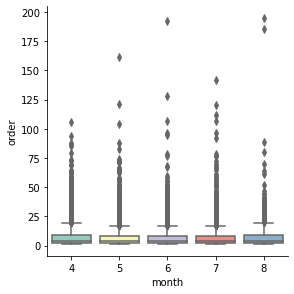

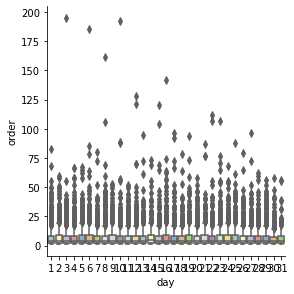

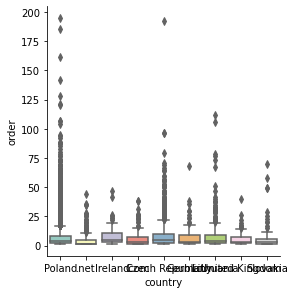

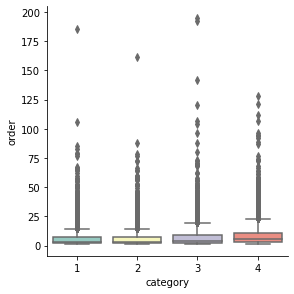

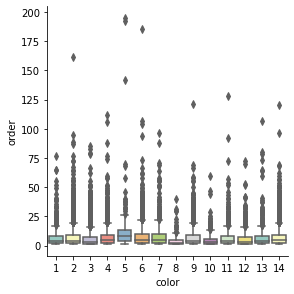

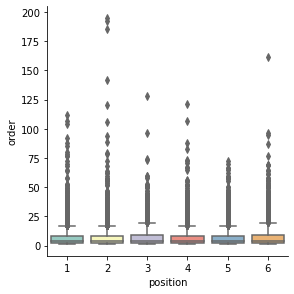

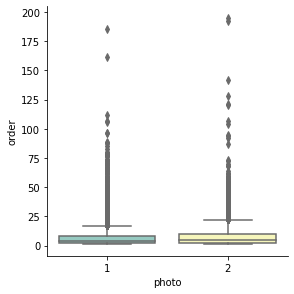

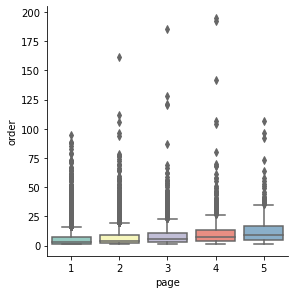

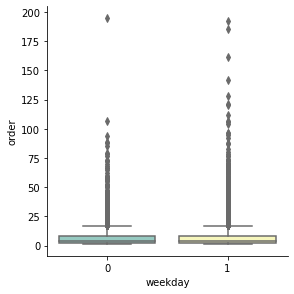

In [57]:
for i in df_cat.columns:
    sns.catplot(data=df, x=i, y="order",
            kind="box", palette="Set3",height=4);
plt.show()


In [58]:
#df_cat.drop(['month', 'day'], axis=1, inplace=True)

In [59]:
dummies = pd.get_dummies(df_cat.astype(str)) 
dummies

,month_4,month_5,month_6,month_7,month_8,day_1,day_10,day_11,day_12,day_13,...,position_6,photo_1,photo_2,page_1,page_2,page_3,page_4,page_5,weekday_0,weekday_1
0,0,1,0,0,0,0,0,1,0,0,...,1,1,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
19996,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
19997,0,0,1,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
19998,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


### 1.3.3 Numerical

<AxesSubplot:xlabel='order', ylabel='Count'>

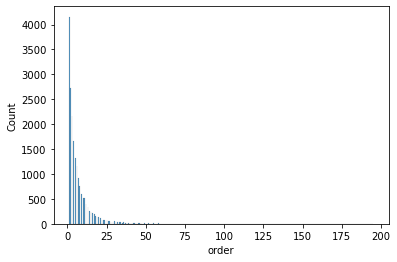

In [60]:
sns.histplot(x = df['order'], data=df)

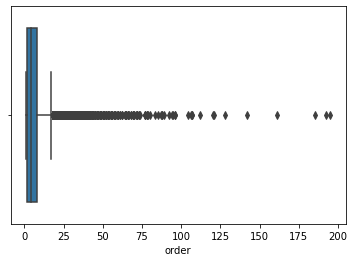

In [61]:
sns.boxplot(x=df['order'], data=df);

We can see how most of the orders were done with less than 25 clicks. Moreover, the boxplot shows how the 75 quartile is around 20 clicks.

As it has exponential distribution, we can apply the log.

In [62]:
import math
df_num['log_order']=df_num['order'].apply(lambda x: math.log(x+1))

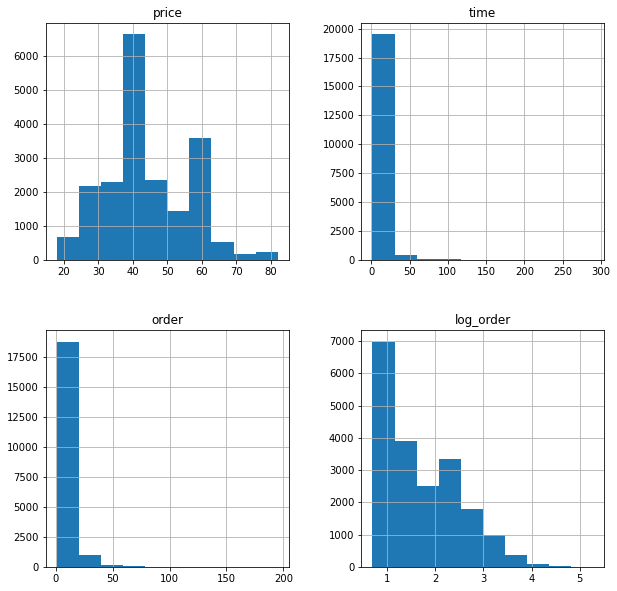

In [63]:
df_num.hist(figsize=(10,10));

Time also seems exponential. Change this.

In [64]:
import math
df_num['log_time']=df_num['time'].apply(lambda x: math.log(x+1))

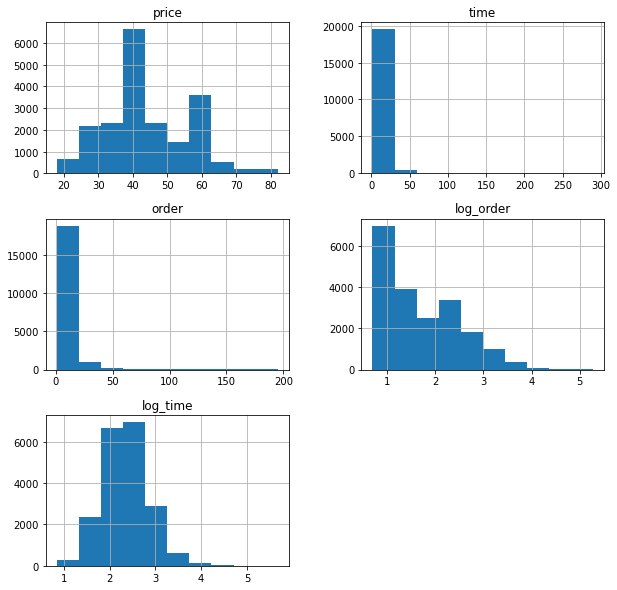

In [65]:
df_num.hist(figsize=(10,10));

Now we have order and time as logarithmic which seem to be much better for our models.

Let's look at correlation of variables..

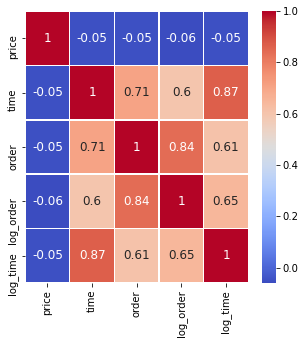

In [66]:
plt.figure(figsize = (5,5))
sns.heatmap(data=df_num.corr().round(2), cmap='coolwarm', linewidths=.5, annot=True, annot_kws={"size":12})
plt.show()

We can see for example that order is highly correlated with time. This can tell us that this might be a good variable for predicting the our target.

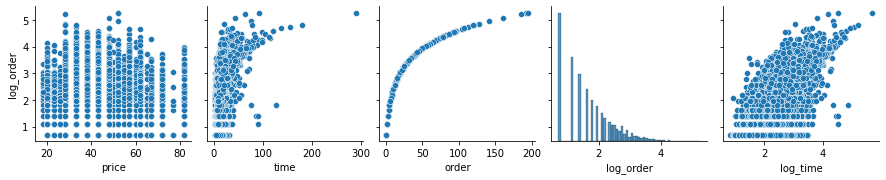

In [67]:
sns.pairplot(df_num, x_vars=df_num.columns, y_vars='log_order')

Again using this graph we can see how there is a clear relationship between the time and the number of clicks for the purchase. It makes common sense to think that more time spent can be transalted into more clicks.

In [68]:
#drop the extra columns
df_num.drop(["time", 'order'], axis=1, inplace=True)
df_num.columns

Index(['price', 'log_order', 'log_time'], dtype='object')

### 1.4 Data Standarization

In [69]:
df_for_scaling = df_num.drop('log_order', axis=1)

<AxesSubplot:>

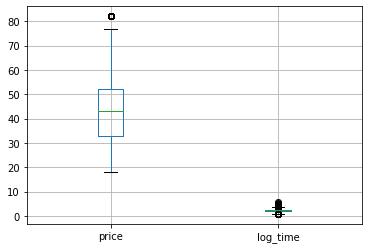

In [70]:
df_for_scaling.boxplot()

(array([1, 2]), [Text(1, 0, 'price'), Text(2, 0, 'log_time')])

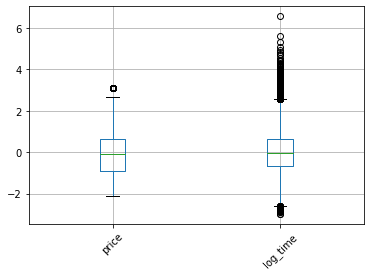

In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df_for_scaling)
df_num_scaled = pd.DataFrame(scaler.transform(df_for_scaling))
df_num_scaled.columns = df_for_scaling.columns

df_num_scaled.boxplot()
plt.xticks(rotation=45)

Now we have the numerical values scaled.

### 1.4 Concat and Train Test separatation

In [72]:
X = pd.concat([df_num_scaled, dummies], axis=1)
X.head()

,price,log_time,month_4,month_5,month_6,month_7,month_8,day_1,day_10,day_11,...,position_6,photo_1,photo_2,page_1,page_2,page_3,page_4,page_5,weekday_0,weekday_1
0,0.646971,0.917169,0,1,0,0,0,0,0,1,...,1,1,0,1,0,0,0,0,1,0
1,-0.488799,0.655958,1,0,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
2,0.322465,-0.714399,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
3,-0.488799,0.334950,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
4,0.646971,-0.299503,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [73]:
y = df_num['log_order']
y.head()

0    3.970292
1    2.197225
2    0.693147
3    2.772589
4    1.386294
Name: log_order, dtype: float64

In [74]:
#X=X[y<4]
#y=y[y<4]

print(X.shape)
print(y.shape)

(20000, 117)
(20000,)


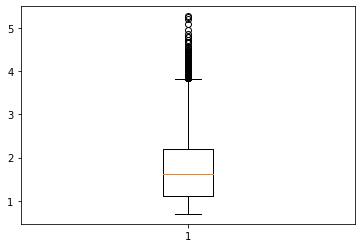

In [75]:
plt.boxplot(y);

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, 
                                                    random_state= 123)

print(X_train.shape, X_test.shape)

(14000, 117) (6000, 117)


## 2. Modelling

In [77]:
from sklearn.model_selection import GridSearchCV
import math

def gs_regression(model, par) :
    gs = GridSearchCV(model, par,cv=3,scoring ='neg_mean_absolute_error') 
    gs = gs.fit(X_train,y_train)

    #summarize the results of your GRIDSEARCH
    print('***GRIDSEARCH RESULTS***')
    print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
    means = gs.cv_results_['mean_test_score']
    stds = gs.cv_results_['std_test_score']
    params = gs.cv_results_['params']
    #for mean, stdev, param in zip(means, stds, params):
    #    print("%f (%f) with: %r" % (mean, stdev, param))
    
    y_pred_train=gs.predict(X_train)
    y_pred_test=gs.predict(X_test) 
    
    y_train_exp=y_train.apply(lambda x: math.exp(x)-1)
    y_test_exp=y_test.apply(lambda x: math.exp(x)-1)
    y_pred_train_exp=np.exp(y_pred_train)-1
    y_pred_test_exp=np.exp(y_pred_test)-1
    
            
    from sklearn import metrics
    print()
    print("MAE  train %.3f (%f)  test %.3f (%f)" % (metrics.mean_absolute_error(y_train, y_pred_train), metrics.mean_absolute_error(y_train_exp, y_pred_train_exp) ,metrics.mean_absolute_error(y_test, y_pred_test),  metrics.mean_absolute_error(y_test_exp, y_pred_test_exp)  ) )
    print("MSE  train %.3f              test %.3f" % (metrics.mean_squared_error(y_train, y_pred_train), metrics.mean_squared_error(y_test, y_pred_test)) ) 
    print("RMSE train %.3f              test %.3f" % (np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)), np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))) ) 
    print("r2   train %.3f              test %.3f" % (metrics.r2_score(y_train, y_pred_train), metrics.r2_score(y_test, y_pred_test)) )
    
    plt.scatter(gs.predict(X_train),gs.predict(X_train)-y_train, c="b", label="training data")
    plt.scatter(gs.predict(X_test),gs.predict(X_test)-y_test, c="g", label="hold out data")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.legend(loc="upper left")
    plt.hlines(y=0, xmin=-10, xmax=50, color="r")
    plt.xlim([-1,5])
    plt.show()

### 2.1 Linear

***GRIDSEARCH RESULTS***
Best score: -2544560.684598 using {}

MAE  train 0.475 (3.576898)  test 666704238.049 (3.641162)
MSE  train 0.359              test 1317793972376313266176.000
RMSE train 0.600              test 36301432098.146
r2   train 0.446              test -2013453314726223937536.000


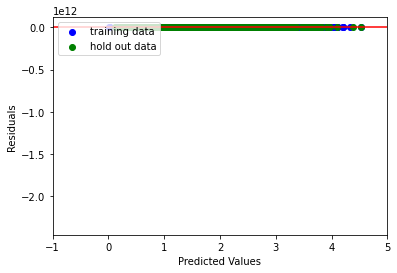

In [78]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression() 
parameters = {}

gs_regression(regressor, parameters)

### 2.2 Ridge

***GRIDSEARCH RESULTS***
Best score: -0.479017 using {'alpha': 10, 'normalize': False}

MAE  train 0.476 (3.582810)  test 0.485 (3.637407)
MSE  train 0.360              test 0.371
RMSE train 0.600              test 0.609
r2   train 0.445              test 0.433


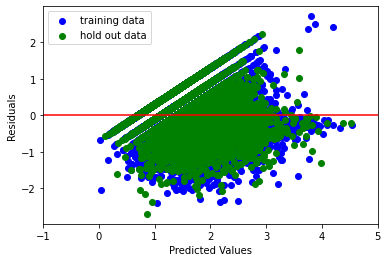

In [79]:
from sklearn.linear_model import Ridge

regressor = Ridge()
parameters = {"alpha": [0.001,0.01,0.1,1,10], "normalize": [True, False]}

gs_regression(regressor, parameters)

### 2.3 Lassoo

***GRIDSEARCH RESULTS***
Best score: -0.477852 using {'alpha': 0.001, 'normalize': False}

MAE  train 0.477 (3.590720)  test 0.483 (3.631113)
MSE  train 0.361              test 0.369
RMSE train 0.601              test 0.608
r2   train 0.443              test 0.435


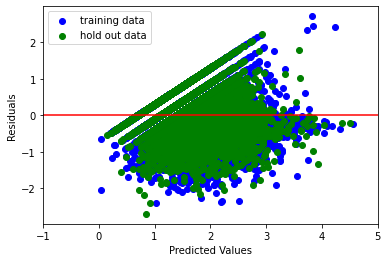

In [80]:
from sklearn.linear_model import Lasso

regressor = Lasso()
parameters = {"alpha": [0.001,0.01,0.1,1,10], "normalize": [True, False]}

gs_regression(regressor, parameters)


### 2.4 KNN Regression

***GRIDSEARCH RESULTS***
Best score: -0.519720 using {'n_neighbors': 27, 'p': 2}

MAE  train 0.498 (3.830093)  test 0.523 (4.007489)
MSE  train 0.377              test 0.414
RMSE train 0.614              test 0.643
r2   train 0.419              test 0.368


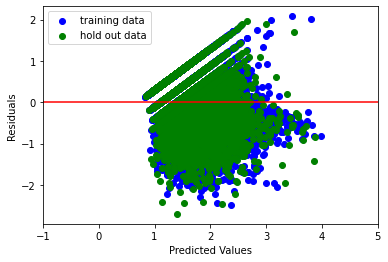

In [272]:
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor()

parameters = {'n_neighbors': np.arange(5,30,2),
              'p': [1,2]
            }

gs_regression(regressor, parameters)

### 2.5 Random Forest

***GRIDSEARCH RESULTS***
Best score: -0.474879 using {'criterion': 'mse', 'min_samples_leaf': 55, 'n_estimators': 500, 'random_state': 42}

MAE  train 0.460 (3.422689)  test 0.479 (3.583695)
MSE  train 0.338              test 0.365
RMSE train 0.582              test 0.604
r2   train 0.478              test 0.442


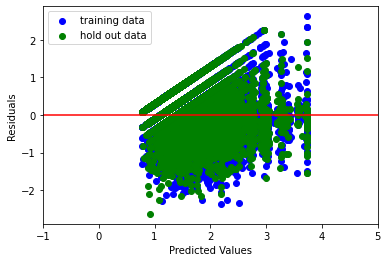

In [81]:
from sklearn.ensemble import RandomForestRegressor 

regressor = RandomForestRegressor()
parameters = {"n_estimators":[480, 500], "criterion": ['mse'], 
              "min_samples_leaf": [55, 57 ], "random_state" : [42]}

gs_regression(regressor, parameters)


### 2.6 SVM

In [ ]:
from sklearn.svm import SVR

regressor = SVR()
parameters = {'C': [0.1,10,100],
             'epsilon': [0.01,1],
             'gamma':['auto'],
             'kernel': ['linear'], #,'poly'
             'degree': [2,3]
             }

#gs_regression(regressor, parameters)

### 2.7 MLP Regressor

***GRIDSEARCH RESULTS***
Best score: -0.472714 using {'alpha': 0.05, 'batch_size': 20, 'hidden_layer_sizes': (20, 10, 5), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'sgd'}

MAE  train 0.469 (3.464262)  test 0.477 (3.540348)
MSE  train 0.350              test 0.361
RMSE train 0.592              test 0.601
r2   train 0.460              test 0.448


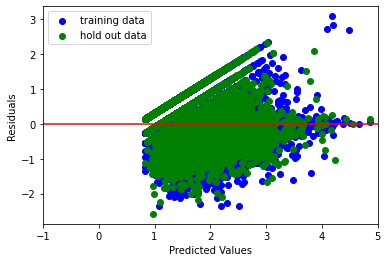

In [927]:
from sklearn.neural_network import MLPRegressor

regressor = MLPRegressor(random_state=0)
parameters = {'hidden_layer_sizes': [(20,10,5)],
              'solver' : ['sgd'],
              'batch_size': [20],
              'learning_rate' : ['constant'],
              'alpha': [0.01, 0.05],
              'max_iter':[1000]}

gs_regression(regressor, parameters)

### 2.8 Gradient Boost

***GRIDSEARCH RESULTS***
Best score: -0.472604 using {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 400, 'random_state': 10}

MAE  train 0.465 (3.429138)  test 0.476 (3.558657)
MSE  train 0.346              test 0.361
RMSE train 0.588              test 0.601
r2   train 0.467              test 0.449


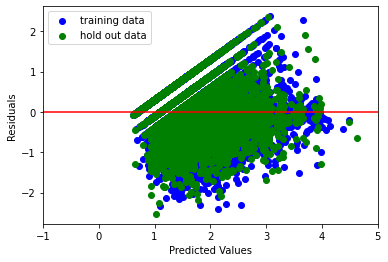

In [925]:
from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor() 
parameters = {"n_estimators":[400, 500], "learning_rate":[0.05, 0.02], 
              "random_state" : [10] ,
             "max_depth":[2,3]}

gs_regression(regressor, parameters)

## 3.0 Clustering

### 3.1 KMeans

In [75]:
df_clust = pd.concat([X, y], axis=1)
df_clust.head()

,price,log_time,month_4,month_5,month_6,month_7,month_8,day_1,day_10,day_11,...,photo_1,photo_2,page_1,page_2,page_3,page_4,page_5,weekday_0,weekday_1,log_order
0,0.646971,0.917169,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,3.970292
1,-0.488799,0.655958,1,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,2.197225
2,0.322465,-0.714399,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0.693147
3,-0.488799,0.334950,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,2.772589
4,0.646971,-0.299503,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,1.386294


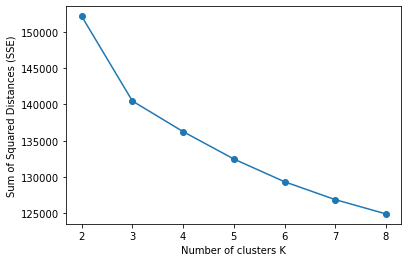

In [76]:
from sklearn.cluster import KMeans

# Select the number of clusters by means of SSE
SSE = []
range_n_clusters = range(2,9)
for nclust in range_n_clusters:
    # Initialize K-means clustering
    km = KMeans(n_clusters=nclust, 
                init='random', # or 'k-means++'
                n_init=10, 
                max_iter=100, 
                random_state=0)
    # Generate K-means clustering
    km.fit(df_clust)
    SSE.append(km.inertia_)
    
plt.plot(range_n_clusters, SSE, marker='o')
plt.xlabel('Number of clusters K')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.show()

N° of clusters = 2 -> Average silhouette coefficient:  0.10376511751560068
N° of clusters = 3 -> Average silhouette coefficient:  0.09275309304272969
N° of clusters = 4 -> Average silhouette coefficient:  0.06869984410597584
N° of clusters = 5 -> Average silhouette coefficient:  0.0665548152941086
N° of clusters = 6 -> Average silhouette coefficient:  0.06561568635398723
N° of clusters = 7 -> Average silhouette coefficient:  0.06247704112851958
N° of clusters = 8 -> Average silhouette coefficient:  0.05886267307117651


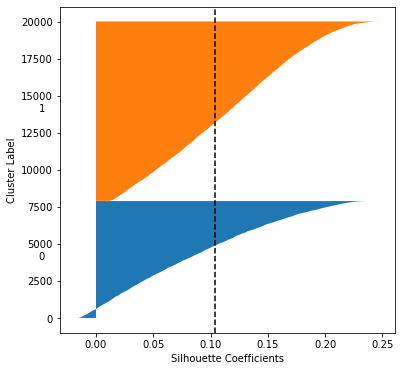

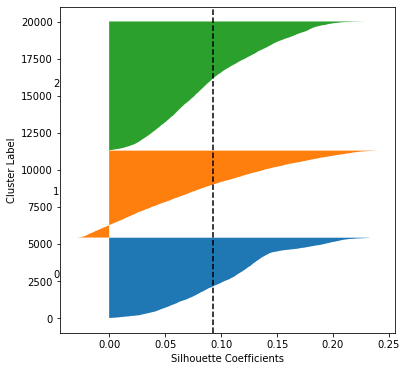

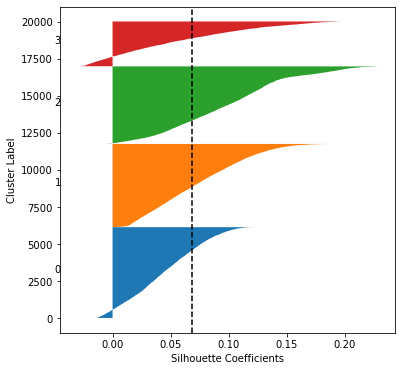

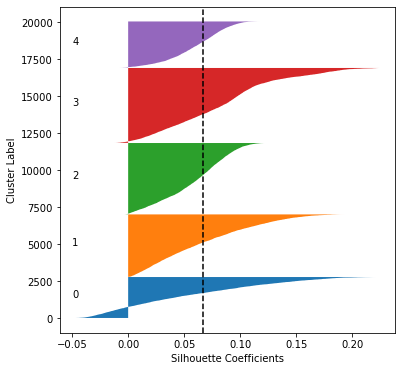

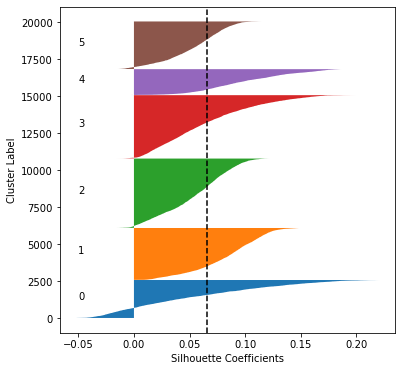

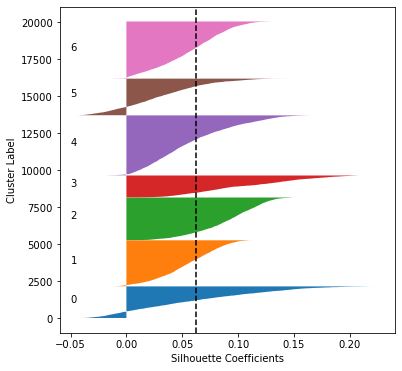

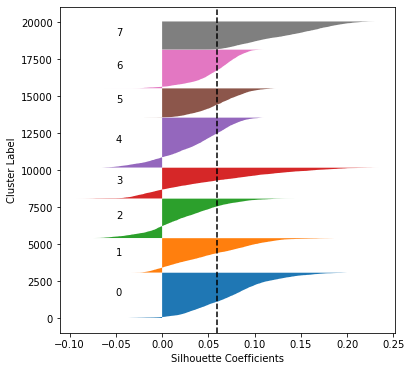

In [78]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Select the number of clusters by means of the silohuette coefficient
range_n_clusters = range(2,9)
for nclust in range_n_clusters:
    
    # Initialize K-means clustering
    km = KMeans(n_clusters=nclust,
                init='random',
                n_init=10, 
                max_iter=100,
                random_state=0)
    
    # Generate K-means clustering, compute cluster centers and predict the cluster label for each example
    cluster_labels = km.fit_predict(df_clust)
    cluster_labels_set = np.unique(cluster_labels)
    
    # Compute the average silhouette coefficient
    silhouette_avg_coeff = silhouette_score(df_clust, cluster_labels)
    print("N° of clusters =", nclust, "-> Average silhouette coefficient: ", silhouette_avg_coeff)
    
    # Compute the silhouette coefficient for each example
    silhouette_example_coeff = silhouette_samples(df_clust, cluster_labels)
    
    # For the examples belonging to each cluster plot the silhouette coefficient
    fig = plt.figure(nclust) 
    fig.set_size_inches(6,6)
    ax1 = fig.add_subplot()
    
    y_lower = 0
    for i in cluster_labels_set:
        # Aggregate and sort the silhouette coefficients for the examples belonging to the cluster
        cluster_i_silhouette_coeff = silhouette_example_coeff[cluster_labels==i]
        cluster_i_silhouette_coeff.sort()
        y_upper = y_lower + cluster_i_silhouette_coeff.shape[0]
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_i_silhouette_coeff)
        ax1.text(-0.05, y_lower + 0.5 * cluster_i_silhouette_coeff.shape[0], str(i))
        y_lower = y_upper + 10
    
    # Enrich the silhouette plot
    ax1.axvline(x=silhouette_avg_coeff, color="black", linestyle="--")
    ax1.set_xlabel("Silhouette Coefficients")
    ax1.set_ylabel("Cluster Label")

In [79]:
# Generate the final K-means clustering model
km = KMeans(n_clusters=3,
            init='random',
            n_init=10, 
            max_iter=100,
            random_state=0)
cluster_labels = km.fit_predict(X)
df_clust['Cluster_Label_K_Means'] = cluster_labels
df_clust

,price,log_time,month_4,month_5,month_6,month_7,month_8,day_1,day_10,day_11,...,photo_2,page_1,page_2,page_3,page_4,page_5,weekday_0,weekday_1,log_order,Cluster_Label_K_Means
0,0.646971,0.917169,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,3.970292,2
1,-0.488799,0.655958,1,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,2.197225,0
2,0.322465,-0.714399,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0.693147,1
3,-0.488799,0.334950,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,2.772589,0
4,0.646971,-0.299503,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1.386294,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1.052603,2.613190,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,3.258097,0
19996,-0.488799,-0.322571,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,1.098612,1
19997,0.646971,-1.757971,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0.693147,2
19998,-0.083167,-0.118959,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1.945910,1


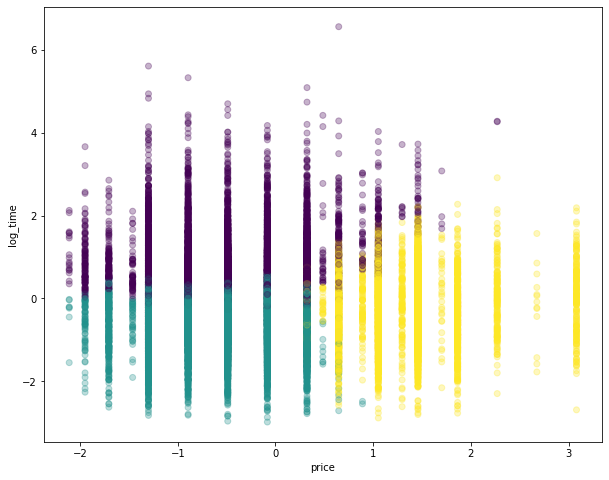

In [80]:
plt.figure(figsize=(10,8))
plt.scatter(df_clust['price'],df_clust['log_time'],c=cluster_labels, alpha=0.3)
plt.xlabel("price")
plt.ylabel("log_time")
plt.show()

<Figure size 1080x720 with 0 Axes>

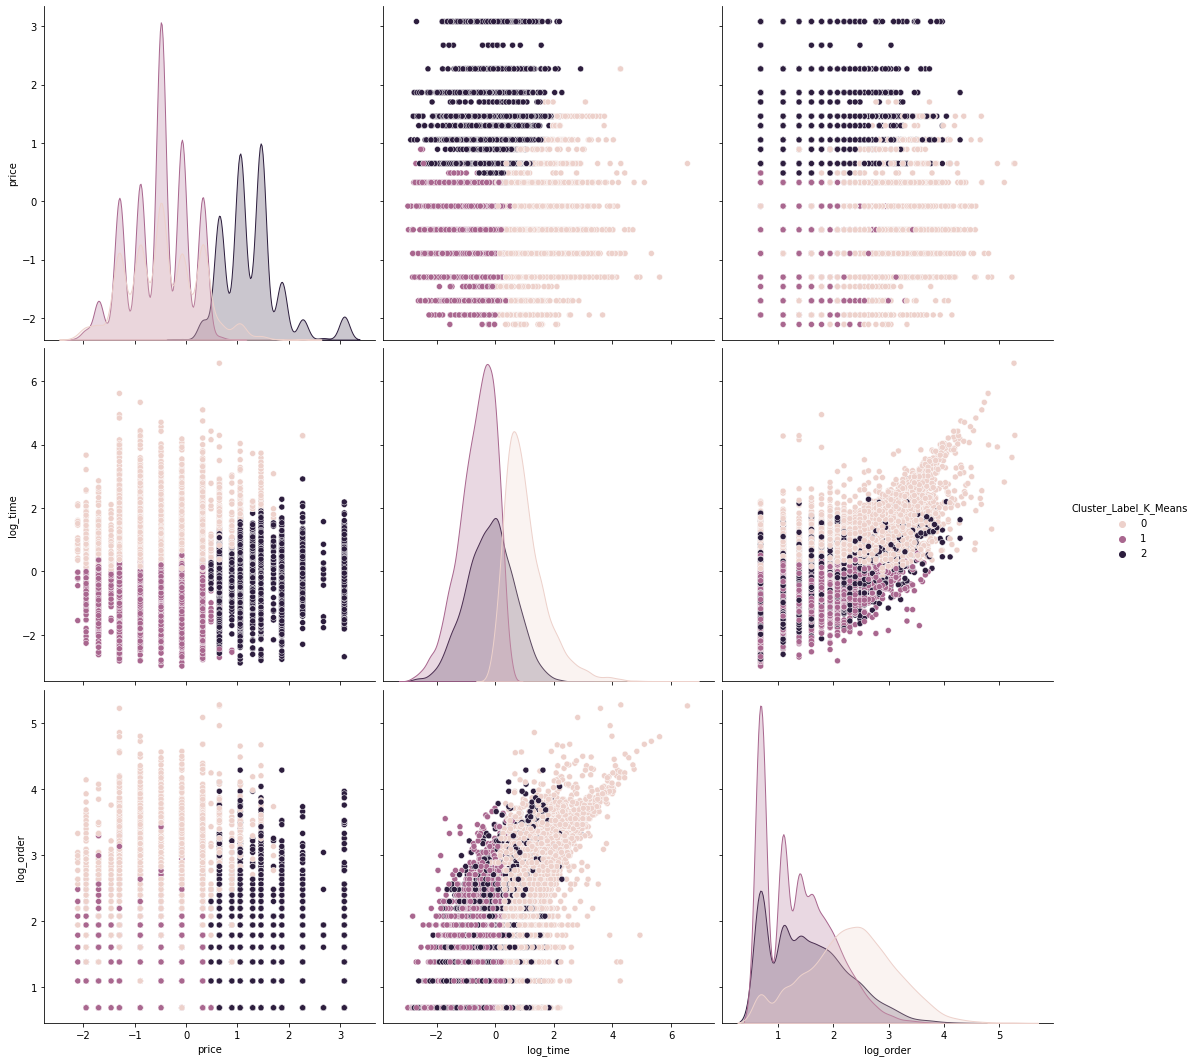

In [279]:
plt.figure(figsize=(15,10))
sns.pairplot(df_clust[['price', 'log_time', 'log_order', 'Cluster_Label_K_Means']],hue='Cluster_Label_K_Means', height=5)
plt.show()

### 4.2 DBScan

In [81]:
from sklearn.cluster import DBSCAN

# Initialize the density-based clustering algorithm
# From scikit-learn: [‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’]
# From scipy.spatial.distance [‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘correlation’, ‘dice’, ‘hamming’, ‘jaccard’, ‘kulsinski’, 
# ‘mahalanobis’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, 
#‘sokalsneath’, ‘sqeuclidean’, ‘yule’]
dbs = DBSCAN(eps=0.35, min_samples=5, metric='euclidean')
# Generate density-based clustering and predict the cluster label for each example
cluster_labels = dbs.fit_predict(X)
X['Cluster_Label'] = cluster_labels
X

,price,log_time,month_4,month_5,month_6,month_7,month_8,day_1,day_10,day_11,...,photo_1,photo_2,page_1,page_2,page_3,page_4,page_5,weekday_0,weekday_1,Cluster_Label
0,0.646971,0.917169,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,-1
1,-0.488799,0.655958,1,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,-1
2,0.322465,-0.714399,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,-1
3,-0.488799,0.334950,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,-1
4,0.646971,-0.299503,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1.052603,2.613190,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,-1
19996,-0.488799,-0.322571,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,-1
19997,0.646971,-1.757971,0,0,1,0,0,1,0,0,...,1,0,1,0,0,0,0,1,0,-1
19998,-0.083167,-0.118959,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,-1


In [82]:
X['Cluster_Label'].value_counts()

-1     19861
 1        12
 14        9
 10        9
 3         8
 17        7
 13        7
 0         6
 2         6
 19        6
 4         6
 12        6
 11        6
 8         6
 9         5
 21        5
 7         5
 6         5
 16        5
 5         5
 20        5
 18        5
 15        5
Name: Cluster_Label, dtype: int64

The clustering is not good at all. Most values are discarded. Doesn't make sense interpreting.

### 4.3 Hierarchical

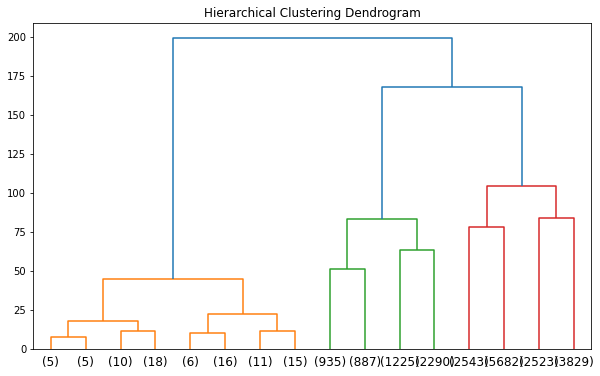

In [83]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Compute the linkage matrix
linkage_matrix = linkage(X, metric='euclidean', method='ward')

plt.figure(figsize=(10,6))
plt.title('Hierarchical Clustering Dendrogram')
# Plot the top X levels of the dendrogram
# Caution!: A “level” includes all nodes with p merges from the final merge
dendrogram(linkage_matrix, truncate_mode='level', p=3)
plt.show()

In [87]:
from sklearn.cluster import AgglomerativeClustering

# Initialize the hierarchical clustering algorithm
# affinity -> 'euclidean', 'manhattan', 'cosine' or 'precomputed' (similarity matrix)
# linkage -> ‘ward’ (default), ‘complete’, ‘average’, ‘single’
hc = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=2)
# Generate hierarchical clustering and predict the cluster label for each example
cluster_labels = hc.fit_predict(X)
X['Cluster_Label'] = cluster_labels
X

,price,log_time,month_4,month_5,month_6,month_7,month_8,day_1,day_10,day_11,...,photo_1,photo_2,page_1,page_2,page_3,page_4,page_5,weekday_0,weekday_1,Cluster_Label
0,0.646971,0.917169,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,1
1,-0.488799,0.655958,1,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
2,0.322465,-0.714399,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
3,-0.488799,0.334950,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4,0.646971,-0.299503,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1.052603,2.613190,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
19996,-0.488799,-0.322571,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
19997,0.646971,-1.757971,0,0,1,0,0,1,0,0,...,1,0,1,0,0,0,0,1,0,1
19998,-0.083167,-0.118959,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [88]:
X['Cluster_Label'].value_counts()

0    14608
1     5392
Name: Cluster_Label, dtype: int64

/Users/joaquinbembhy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='log_time'>

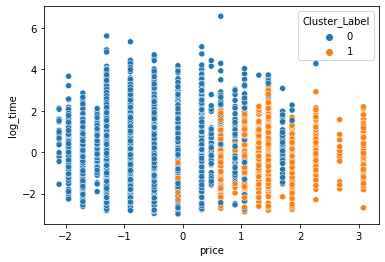

In [89]:
sns.scatterplot(X['price'], X['log_time'], hue=X['Cluster_Label'], data=X)
#plt.scatter(X['price'],X['log_time'],c=X['Cluster_Label'])

## 5.0 Interpretation

In [82]:
# Install the package in the current Jupyter kernel
import sys
%conda install --yes --prefix {sys.prefix} shap
!{sys.executable} -m pip install shap

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/joaquinbembhy/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [83]:
import pandas as pd

df_X_train = pd.DataFrame(X_train)

In [84]:
import shap  

shap.initjs()

explainer_rf = shap.TreeExplainer(rf,categorical_features=df_cat.columns)
shap_values = explainer_rf.shap_values(df_X_train)

shap.summary_plot(shap_values, df_X_train, plot_type="bar")

In [1]:
import shap

rf = RandomForestRegressor(n_estimators=500, criterion='mse', min_samples_leaf=60, random_state=42)
rf.fit(X_train, y_train)

shap.initjs()

explainer_rf = shap.TreeExplainer(rf, categorical_features=df_cat.columns)
shap_values = explainer_rf.shap_values(df_X_train)

shap.summary_plot(shap_values, df_X_train, plot_type="bar")



In [1]:
shap.summary_plot(shap_values, df_X_train)

NameError: name 'shap' is not defined

## 6.0 Model Predictions

### 6.1 Retraining the model with whole dataset

In [79]:
from sklearn.ensemble import RandomForestRegressor 

rf = RandomForestRegressor(n_estimators=500, criterion='mse', min_samples_leaf=55, random_state=42)
rf.fit(X, y)

RandomForestRegressor(min_samples_leaf=55, n_estimators=500, random_state=42)

In [947]:
#gbr = GradientBoostingRegressor(learning_rate= 0.05, max_depth= 2, n_estimators= 400, random_state= 10)
#gbr.fit(X, y)

GradientBoostingRegressor(learning_rate=0.05, max_depth=2, n_estimators=400,
                          random_state=10)

In [80]:
y_pred=rf.predict(X)
error=y-y_pred

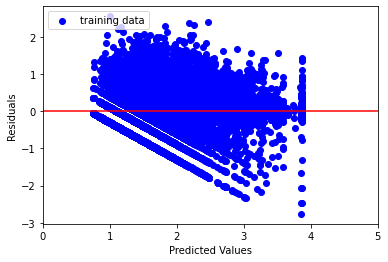

In [81]:
plt.scatter(y_pred,error, c="b", label="training data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=0, xmax=8, color="r")
plt.xlim([0,5])
plt.show()

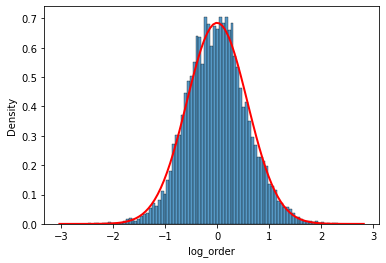

In [82]:
import numpy as np
import scipy 
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples
from matplotlib import pyplot as plt
import seaborn as sns

#dist = getattr(scipy.stats, 'norm')
#param = dist.fit(error)

err_mean=error.mean()
err_std=error.std()

# We generate a sample of size  len(mr_scaled) of data distributed according to distribution dist
# The function rvs generates a sample with distribution dist with mean loc and std scale
#test_dist = dist.rvs(*param[0:-2],loc=param[-2], scale=param[-1],size = len(error))


# plot the distribution and compare with a normal

ax = sns.histplot(error, stat='density')

# calculate the pdf
x0, x1 = ax.get_xlim()  # extract the endpoints for the x-axis
x_pdf = np.linspace(x0, x1, 100)
y_pdf = scipy.stats.norm.pdf(x_pdf, loc=err_mean, scale=err_std)

ax.plot(x_pdf, y_pdf, 'r', lw=2, label='normal')                                                   
#ax.legend() 

#plt.hist(nb_error,alpha=.3, density=True,bins='auto')
#plt.hist(test_dist,alpha=.3, density=True,bins='auto')
#plt.show()

In [84]:
import pickle
pickle.dump(rf, open('gbr_model.pkl', 'wb'))

### 6.2 Making predictions

In [85]:
df2 = pd.read_csv('prediction.csv')

In [86]:
df2['country'].nunique()

29

We must perform all the same we performed to the train dataset.

In [87]:
df2_cat=df2[['country', 'category', 'color', 'position', 'photo', 'page']]
dummies2 = pd.get_dummies(df2_cat.astype(str)) 
dummies2

,country_10,country_11,country_12,country_14,country_15,country_16,country_17,country_19,country_2,country_20,...,position_4,position_5,position_6,photo_1,photo_2,page_1,page_2,page_3,page_4,page_5
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3996,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3998,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0


In [88]:
df2_num = df2[['price', 'time']]

In [89]:
df2_num['log_time']=df2_num['time'].apply(lambda x: math.log(x+1))

/var/folders/02/gqwmyjxx11sbdtyzr3frrb3w0000gn/T/ipykernel_6652/2279236904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_num['log_time']=df2_num['time'].apply(lambda x: math.log(x+1))


In [90]:
df2_num.drop(["time"], axis=1, inplace=True)
df2_num.columns

/Users/joaquinbembhy/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Index(['price', 'log_time'], dtype='object')

<AxesSubplot:>

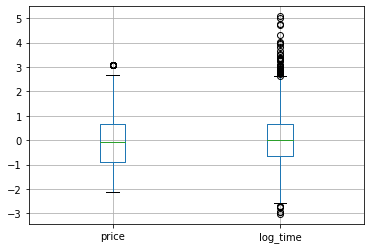

In [91]:
df2_num_scaled = pd.DataFrame(scaler.transform(df2_num))
df2_num_scaled.columns = df2_num.columns
df2_num_scaled.boxplot()


In [92]:
X2 = pd.concat([df2_num_scaled, dummies2], axis=1)
X2.head()

,price,log_time,country_10,country_11,country_12,country_14,country_15,country_16,country_17,country_19,...,position_4,position_5,position_6,photo_1,photo_2,page_1,page_2,page_3,page_4,page_5
0,-0.488799,0.016579,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0
1,0.646971,-0.982955,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
2,-0.488799,0.554489,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
3,0.322465,1.149286,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,1.458235,-1.150770,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0


As the dataset from predictions has less columns than our previos traind dataset, we need to create those columns with all 0 values. 

In [93]:
import joblib

model_columns = list(X.columns)
joblib.dump(model_columns, 'columnsModel.pk1')

['columnsModel.pk1']

In [94]:
columnsModel = joblib.load('columnsModel.pk1')
model_transformed = X2.reindex(columns=columnsModel, fill_value=0)

In [95]:
model_transformed.shape

(4000, 117)

In [96]:
loaded_model = pickle.load(open('gbr_model.pkl', 'rb'))

Now yes perform the appropiate predictions

In [97]:
y2_predictions=loaded_model.predict(model_transformed)

In [98]:
y2_predictions

array([1.50961585, 1.17023811, 1.93037508, ..., 3.86022589, 1.44373316,
       1.57042958])

Finally, we do the exponential of the variable to get the values in clicks and not as the log of clicks.

In [99]:
y2_predictions_exp = np.exp(y2_predictions)-1
print(y2_predictions_exp)

[ 3.52499217  2.22275993  5.89209488 ... 46.47607435  3.23648178
  3.80871347]


### 6.3 Exporting predictions

In [100]:
np.savetxt("Rigone_Iannotta_Bembhy.csv", y2_predictions_exp.astype(int), delimiter=",", fmt='%.0f')